In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv(r'D:\2025 lessons\AI+ML course amaliyot\Datasets\fitness_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [4]:
from datacleaner import autoclean
df= autoclean(df)

c:\Users\user\.virtualenvs\AI+ML_course_amaliyot-8lQVJ-6X\Lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input_dataframe[column].fillna(input_dataframe[column].median(), inplace=True)
c:\Users\user\.virtualenvs\AI+ML_course_amaliyot-8lQVJ-6X\Lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method wil

In [5]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,1,175,99,1,79,384,112,8850,14.44,0,8.2,1.9,3195,61,38.4,28.5,3,1
1,2,36,2,157,112,0,73,612,168,2821,1.10,0,8.6,1.9,2541,73,38.4,28.5,0,0
2,3,25,0,180,66,2,27,540,133,18898,7.28,0,9.8,1.9,3362,80,38.4,28.5,0,1
3,4,56,1,154,89,1,39,672,118,14102,6.55,2,5.8,1.9,2071,65,38.4,28.5,1,2
4,5,53,2,194,59,4,56,410,170,16518,3.17,2,7.3,1.9,3298,59,38.4,28.5,2,0


In [30]:
y = df['Daily Calories Intake']
X = df.drop(columns=['Daily Calories Intake'])

In [24]:
# Calculate MI
mi_scores = mutual_info_regression(X, y, random_state=42)

# Turn into a pandas Series (sorted for clarity)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display
print(mi_series)

Resting Heart Rate (bpm)    0.007269
Distance (km)               0.006821
User ID                     0.006065
Daily Calories Intake       0.004762
VO2 Max                     0.003400
Steps Taken                 0.002571
Gender                      0.002065
Workout Intensity           0.001384
Calories Burned             0.001300
Water Intake (liters)       0.001211
Age                         0.000000
Heart Rate (bpm)            0.000000
Height (cm)                 0.000000
Weight (kg)                 0.000000
Workout Duration (mins)     0.000000
Sleep Hours                 0.000000
Body Fat (%)                0.000000
Mood Before Workout         0.000000
Mood After Workout          0.000000
dtype: float64


In [25]:
selected_features = mi_series[mi_series > 0].index.tolist()

X_selected = X[selected_features]

X_selected

,Resting Heart Rate (bpm),Distance (km),User ID,Daily Calories Intake,VO2 Max,Steps Taken,Gender,Workout Intensity,Calories Burned,Water Intake (liters)
0,61,14.44,1,3195,38.4,8850,1,0,384,1.9
1,73,1.10,2,2541,38.4,2821,2,0,612,1.9
2,80,7.28,3,3362,38.4,18898,0,0,540,1.9
3,65,6.55,4,2071,38.4,14102,1,2,672,1.9
4,59,3.17,5,3298,38.4,16518,2,2,410,1.9
...,...,...,...,...,...,...,...,...,...,...
9995,56,12.83,9996,3718,38.4,1330,2,2,230,1.9
9996,72,9.74,9997,2752,38.4,3236,0,1,539,1.9
9997,73,14.51,9998,1572,38.4,10532,1,2,886,1.9
9998,84,1.43,9999,2172,38.4,13690,1,1,447,1.9


In [26]:
x_train,x_test, y_train, y_test =  train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [27]:
xgb_model = LinearRegression().fit(x_train,y_train)

In [28]:
xgb_y_pred = xgb_model.predict(x_test)

In [29]:
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test,xgb_y_pred)
print(xgb_r2, xgb_mse)

-0.0035440850985513084 2.826958599120492


<Axes: xlabel='Daily Calories Intake', ylabel='Count'>

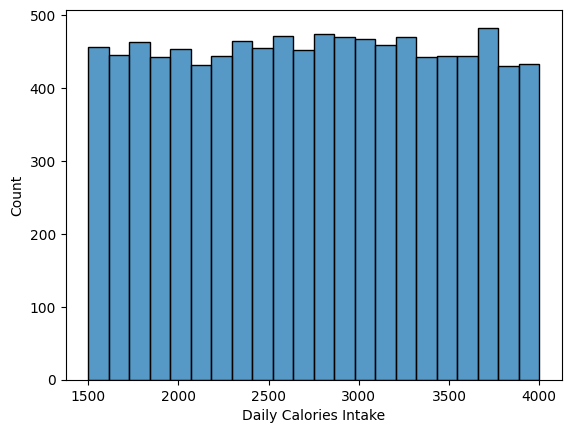

In [17]:
import seaborn as sns
sns.histplot(df['Daily Calories Intake'])